<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [225]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sklearn.model_selection as sms
import sklearn.linear_model as slm
import sklearn.metrics as slmt
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix, demo_data
import random
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [226]:
df = pd.read_csv('data.csv', sep=',')
df.head()
print("Wymiary: ", df.shape)

Wymiary:  (32561, 15)


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [227]:
categorical = []

df_types = df.select_dtypes(include=['object'])
for col in df_types.columns:
    categorical.append(col)

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [228]:
df.info()

# nie ma brakujących elementów 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [229]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [230]:
for var in categorical: 
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [231]:
for col in df.columns:
     df[col].replace(" ?", np.NaN, inplace=True)

df[categorical].isnull().sum()



workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [232]:
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [233]:
df.workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [234]:
cool = df
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



print("the shape of X_train and X_test", X_train.shape, X_test.shape)
print("data types in X_train\n", X_train.dtypes)
print("display categorical variables\n", [col for col in X_train.columns if X_train[col].dtypes == 'O'] )
print("display numerical variables",[col for col in X_train.columns if X_train[col].dtypes != 'O'] )

the shape of X_train and X_test (21113, 14) (9049, 14)
data types in X_train
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object
display categorical variables
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
display numerical variables ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [235]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
print(X_train[categorical].isnull().sum())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64


In [236]:
print(X_test[categorical].isnull().sum())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64


In [237]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [238]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [239]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
print("Wymiary X_train: ", X_train.shape)
X_train.head()

Wymiary X_train:  (21113, 104)


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15977,44,1,0,0,0,0,0,0,222978,1,...,0,0,0,0,0,0,0,0,0,0
13574,32,1,0,0,0,0,0,0,83253,0,...,0,0,0,0,0,0,0,0,0,0
23210,30,0,1,0,0,0,0,0,327825,1,...,0,0,0,0,0,0,0,0,0,0
9284,23,1,0,0,0,0,0,0,109952,0,...,0,0,0,0,0,0,0,0,0,0
8841,54,0,1,0,0,0,0,0,204325,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
#skalowanie

from sklearn.preprocessing import RobustScaler
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372342,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.792790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.246635,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.570154,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.894737,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.216799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [241]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)


#Predict the results 
y_pred = gnb.predict(X_test)

#Check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

#there is no sign of overfitting


Model accuracy score: 0.7998
Training-set accuracy score: 0.8032
Training set score: 0.8032
Test set score: 0.7998


In [242]:
#Compare model accuracy with null accuracy
# check class distribution in test set

(a,b) = y_test.value_counts()


null_accuracy = (a/(a+b))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7475


Confusion matrix

 [[5401 1363]
 [ 449 1836]]

True Positives(TP) =  5401

True Negatives(TN) =  1836

False Positives(FP) =  1363

False Negatives(FN) =  449


<AxesSubplot:>

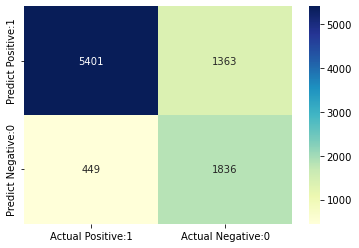

In [243]:
# CONFUSION MATRIX
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

Zadanie 1

In [244]:
X = df.drop(['race'], axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



#encoding
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'sex', 'native_country','income'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
print("Wymiary X_train: ", X_train.shape)
X_train.head()


#skalowanie

from sklearn.preprocessing import RobustScaler
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train = pd.DataFrame(X_train, columns=[cols])




Wymiary X_train:  (21113, 101)


In [245]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)


#Predict the results 
y_pred = gnb.predict(X_test)

#Check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

#there is no sign of overfitting


Model accuracy score: 0.7141
Training-set accuracy score: 0.7094
Training set score: 0.7094
Test set score: 0.7141


In [246]:
#Compare model accuracy with null accuracy
# check class distribution in test set


(a,b,c,d,e) = y_test.value_counts()

null_accuracy = (a/(a+b+c+d+e))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8564


In [247]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
y_test.value_counts()


 White                 7750
 Black                  878
 Asian-Pac-Islander     270
 Amer-Indian-Eskimo      82
 Other                   69
Name: race, dtype: int64

Text(123.0, 0.5, 'Klasa przedywana')

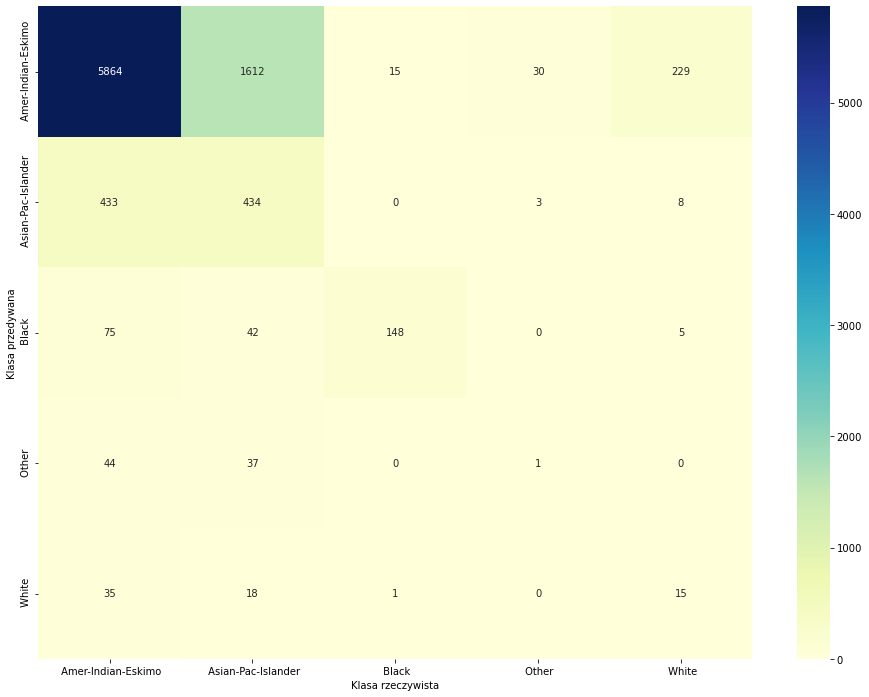

In [248]:
from sklearn.metrics import confusion_matrix
labels = y_test.unique().tolist()
labels = sorted(labels)
cm = confusion_matrix(y_test, y_pred, labels=y_test.value_counts().index)
cm_matrix = pd.DataFrame(data=cm, columns=[labels], 
                                 index=[labels])
f, ax = plt.subplots(figsize=(16, 12))

ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set_xlabel('Klasa rzeczywista')
ax.set_ylabel('Klasa przedywana')


Zadanie 2


In [249]:
X = df.drop(['native_country'], axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



#encoding
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'sex', 'race','income'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
print("Wymiary X_train: ", X_train.shape)
X_train.head()


#skalowanie

from sklearn.preprocessing import RobustScaler
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train = pd.DataFrame(X_train, columns=[cols])



Wymiary X_train:  (21113, 65)


In [250]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)


#Predict the results 
y_pred = gnb.predict(X_test)

#Check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

#there is no sign of overfitting

Model accuracy score: 0.0443
Training-set accuracy score: 0.0453
Training set score: 0.0453
Test set score: 0.0443


In [251]:

#Compare model accuracy with null accuracy
# check class distribution in test set
sum = 0
tab = y_test.value_counts()
for i in range(len(tab)):
    sum += tab[i]
    
null_accuracy = (tab.max()/sum)

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9131


Text(141.0, 0.5, 'Klasa przedywana')

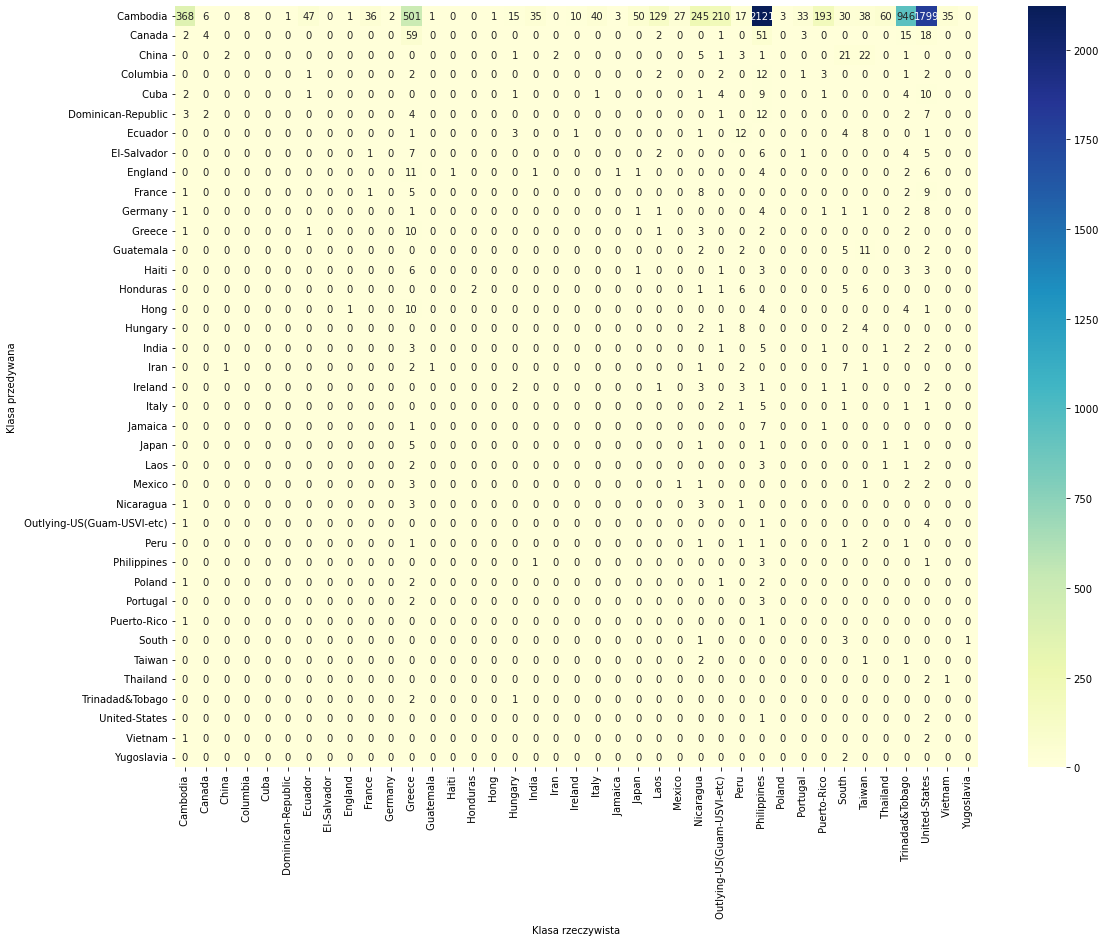

In [252]:
from sklearn.metrics import confusion_matrix
labels = y_test.unique().tolist()
labels = sorted(labels)
cm = confusion_matrix(y_test, y_pred, labels=y_test.value_counts().index)
cm_matrix = pd.DataFrame(data=cm, columns=[labels], 
                                 index=[labels])
f, ax = plt.subplots(figsize=(18, 14))

ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set_xlabel('Klasa rzeczywista')
ax.set_ylabel('Klasa przedywana')

1) ZAROBKI 
Dokładność modelu zarówno dla danych testowych, jak i treningowych jest na poziomie 80%, a dokładność hipotezy zerowej na poziomie 75%. Na podstawie tych wartości można powiedzieć, że klasyfikator spisuje się bardzo dobrze podczas przewidywania 

2) RASA
Jakość klasyfikatora spadła.
Dokładność modelu zarówno dla danych testowych, jak i treningowych jest na poziomie 70%, a dokładność hipotezy zerowej na poziomie 85%.
Taki wynik oznacza, że większą skuteczność uzyskano by gdyby założyć, że wszystkie osoby ze zbioru testowego są białe

3) KRAJ
Jakość modelu jest bardzo zła, model nie nadaja się do użytku
Dokładność modelu zarówno dla danych testowych, jak i treningowych jest na poziomie 4%, a dokładność hipotezy zerowej na poziomie 90%.
Klasyfikator nie zwraca nawet poprawnych predykcji pochodzenia ze Stanów Zjednoczonych, które jest największą grupą wśród osób z bazy danych. Na dokładność modelu wpływa ilosć zmiennych w kolumnie.